In [1]:
import tensorflow as tf
import sklearn as sk
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense,activation,Dropout,BatchNormalization,Conv2D,MaxPool2D
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
import splitfolders
input_folder = "D:\ASL classification\data_2\Data"
output = "D:\ASL classification\data_2\Data_split" 
splitfolders.ratio(input_folder, output=output, seed=42, ratio=(.8, .1, .1))

Copying files: 223074 files [12:22, 300.62 files/s]


In [38]:
from keras.utils import plot_model

In [5]:
train_path = "D:/ASL classification/data_2/Data_split/train"
valid_path = "D:/ASL classification/data_2/Data_split/val" 

In [6]:
train_gen = ImageDataGenerator(rescale=1/255)
valid_gen = ImageDataGenerator(rescale=1/255)

train_data = train_gen.flow_from_directory( directory= train_path , target_size=(200,200) , color_mode="rgb" , batch_size=32, class_mode="categorical", shuffle=True, seed=42 )
valid_data = valid_gen.flow_from_directory(directory= valid_path , target_size=(200,200) , color_mode="rgb" , batch_size=32 , class_mode="categorical" , shuffle=True , seed = 42)

Found 178447 images belonging to 29 classes.
Found 22295 images belonging to 29 classes.


In [7]:
  print("TRAIN DATA DETAILS")
  print(train_data.class_indices)
  print(train_data.image_shape)
  print("------------------------")
  print("VALIDATION DATA DETAILS")
  print(valid_data.image_shape)
  print(valid_data.class_indices)
  print("------------------------")

TRAIN DATA DETAILS
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
(200, 200, 3)
------------------------
VALIDATION DATA DETAILS
(200, 200, 3)
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, 'del': 26, 'nothing': 27, 'space': 28}
------------------------


In [8]:
from keras.applications.mobilenet_v2 import MobileNetV2

In [11]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(224, 224, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(tf.keras.layers.Dense(882, activation= 'relu'))
model.add(tf.keras.layers.Dense(29, activation = 'softmax'))
model.layers[0].trainable = False

In [12]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 7, 7, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_1   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 882)               1129842   
                                                                 
 dense_3 (Dense)             (None, 29)                25607     
                                                                 
Total params: 3,413,433
Trainable params: 1,155,449
Non-trainable params: 2,257,984
_________________________________________________________________


In [15]:
from keras import optimizers

In [16]:
from keras.callbacks import EarlyStopping

In [17]:
callback = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=50)

In [18]:
model.compile(optimizer = optimizers.Adam(lr=0.001), loss = 'categorical_crossentropy', metrics = 'accuracy')

c:\Users\S.Viknesh\miniconda3\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


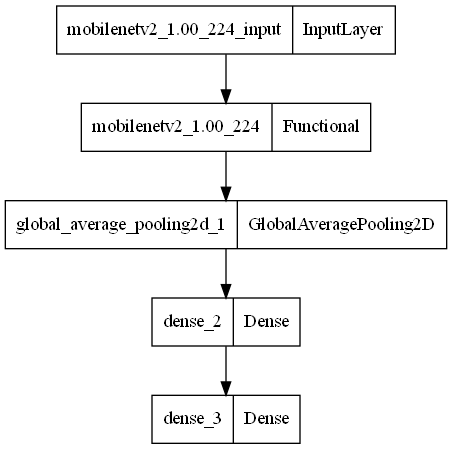

In [39]:
plot_model(model)

In [40]:
history = model.fit(train_data,
epochs= 10,
verbose=1,
batch_size = 6 ,
validation_data = valid_data, callbacks=[callback]
)

Epoch 1/10
5577/5577 [==============================] - 985s 175ms/step - loss: 0.2358 - accuracy: 0.9268 - val_loss: 0.1197 - val_accuracy: 0.9616
Epoch 2/10
5577/5577 [==============================] - 485s 87ms/step - loss: 0.0850 - accuracy: 0.9722 - val_loss: 0.0618 - val_accuracy: 0.9791
Epoch 3/10
5577/5577 [==============================] - 370s 66ms/step - loss: 0.0601 - accuracy: 0.9811 - val_loss: 0.0561 - val_accuracy: 0.9830
Epoch 4/10
5577/5577 [==============================] - 386s 69ms/step - loss: 0.0487 - accuracy: 0.9854 - val_loss: 0.0644 - val_accuracy: 0.9831
Epoch 5/10
5577/5577 [==============================] - 372s 67ms/step - loss: 0.0431 - accuracy: 0.9876 - val_loss: 0.0650 - val_accuracy: 0.9840
Epoch 6/10
5577/5577 [==============================] - 376s 67ms/step - loss: 0.0373 - accuracy: 0.9899 - val_loss: 0.0781 - val_accuracy: 0.9835
Epoch 7/10
5577/5577 [==============================] - 371s 67ms/step - loss: 0.0368 - accuracy: 0.9903 - val_loss: 

In [41]:
model.save("mobile.hdf5")

In [42]:
model.save_weights("mobile.pt")

In [43]:
import matplotlib.pyplot as plt

In [44]:
def plot_accu(hist):
    plt.plot(hist.history["accuracy"])
    plt.plot(hist.history["val_accuracy"])
    plt.title("model accuracy")
    plt.ylabel("accuracy")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

In [45]:
def plot_loss(hist):
    plt.plot(hist.history["loss"])
    plt.plot(hist.history["val_loss"])
    plt.title("model loss")
    plt.ylabel("loss")
    plt.xlabel("epoch")
    plt.legend(["train", "validation"], loc="upper left")
    plt.show()

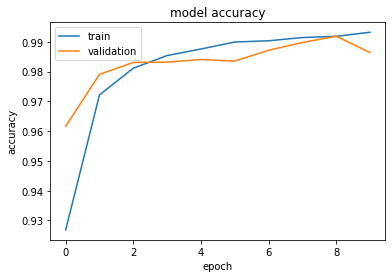

In [46]:
plot_accu(history)


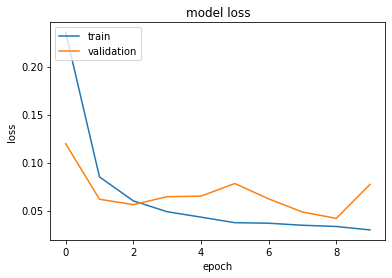

In [47]:
plot_loss(history)

In [69]:
test_gen = ImageDataGenerator(rescale=1/255)
test_data = test_gen.flow_from_directory(directory="D:/ASL classification/data_2/Data_split/test" , target_size=(200,200) , color_mode="rgb" , batch_size=32 , class_mode="categorical" , shuffle=True , seed = 42)

Found 22332 images belonging to 29 classes.


In [70]:
evaluate = model.evaluate(test_data)

698/698 [==============================] - 41s 59ms/step - loss: 0.0597 - accuracy: 0.9879


In [71]:
test1 = "D:/ASL classification/test1.jpg"

In [72]:
import cv2 

In [73]:
from tensorflow.keras.applications.imagenet_utils import preprocess_input

Input image shape: (1, 224, 224, 3)


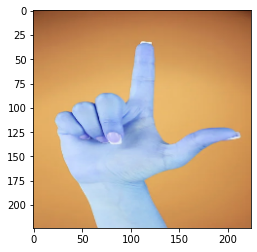

In [74]:
img = cv2.imread(test1)
img = cv2.resize(img,(224, 224))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
x = x/255

print('Input image shape:', x.shape)


plt.imshow(img)





In [78]:
preds=model.predict(x)
print("predicted class: ", preds )
#yes image 

1/1 [==============================] - 0s 34ms/step
predicted class:  [[5.8904776e-25 3.3136448e-28 8.2724885e-20 1.6464264e-16 1.1422772e-27
  2.4123639e-16 1.7317956e-25 3.2968960e-38 1.0313383e-11 1.7305566e-22
  4.7842538e-16 1.0000000e+00 3.7241692e-27 2.9380456e-28 3.2550315e-31
  1.4642164e-24 8.5734429e-24 2.9872705e-23 9.4024384e-33 2.5572275e-21
  4.4516074e-26 2.2707145e-16 1.0018009e-25 1.5599859e-20 5.3409216e-18
  4.4768057e-21 1.5798651e-24 1.4808083e-33 8.5394957e-17]]


In [79]:
print(np.argmax(preds[0]))

11


In [80]:
test2 = "D:/ASL classification/test3.jpg"

Input image shape: (1, 224, 224, 3)


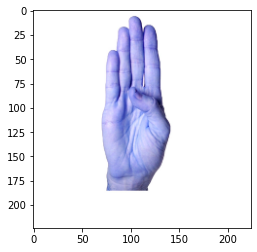

In [81]:
img2 = cv2.imread(test2)
img2 = cv2.resize(img2,(224, 224))

x = np.expand_dims(img2, axis=0)
x = preprocess_input(x)
x = x/255

print('Input image shape:', x.shape)


plt.imshow(img2)


In [82]:
preds=model.predict(x)
print("predicted class: ", preds )
#yes image 

1/1 [==============================] - 0s 27ms/step
predicted class:  [[1.11238336e-07 2.40650862e-01 8.40595009e-13 8.38899068e-05
  3.57640581e-03 7.53954768e-01 2.15244782e-07 1.27479305e-09
  6.64489789e-06 3.86862666e-06 2.02236166e-07 3.58058028e-10
  6.15133104e-06 1.71579665e-03 9.52197414e-13 3.83516377e-18
  2.33566079e-16 8.85717166e-10 1.02112165e-06 3.81963172e-09
  7.94612731e-09 7.73139917e-08 4.56609099e-12 4.58954576e-11
  2.56815325e-09 4.49303095e-11 2.93414008e-11 1.49343662e-10
  1.00932275e-11]]


In [83]:
print(np.argmax(preds[0]))

5


In [84]:
model = tf.keras.models.load_model("D:\ASL classification\codes\mobile.hdf5")

In [85]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("ASL.tflite", 'wb') as f:
    f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\SB584~1.VIK\AppData\Local\Temp\tmp40q851m5\assets


INFO:tensorflow:Assets written to: C:\Users\SB584~1.VIK\AppData\Local\Temp\tmp40q851m5\assets
